### Perceptron

<img src="perceptron.png" alt="perceptron" width="600"/>

In [3]:
# Importing required packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib
from matplotlib.colors import ListedColormap

plt.style.use('fivethirtyeight')

In [4]:
# Create Perceptron class
class Perceptron:
    
    def __init__(self, weights_count: int=3, eta: float=None, epochs: int=None) -> None:
        # assign/initialize small random weights
        self.weights = np.random.randn(weights_count) * 1e-4
        
        # initialize model training flag 
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f'initial weights before training: \n{self.weights}')
            
        # initialize learning rate(eta)
        self.eta = eta
        
        # initialize number of epochs
        self.epochs = epochs
        
        
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f'X with bias: \n{X_with_bias}')
        
        for epoch in range(self.epochs):
            print('--'*10)
            print(f'for epoch >> {epoch}')
            print('--'*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f'predicted value after forward pass: \n{y_hat}')
            
            self.error = self.y - y_hat
            print(f'error: \n{self.error}')
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f'updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}')
            print('##'*10)
            
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f'\ntotal loss: {total_loss}\n')
        return total_loss
    
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
        
        
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    
    def load(self, filepath):
        return joblib.load(filepath) 

In [5]:
def prepare_data(df, target_feature='y'):
    X = df.drop(target_feature, axis=1)
    y = df[target_feature]
    
    return X, y

In [6]:
AND = {
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1],
    'y' : [0, 0, 0, 1]
}

df_AND = pd.DataFrame(AND)
df_AND

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [7]:
X, y = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X, y)

_ = model_and.total_loss()

initial weights before training: 
[-5.60911818e-05  1.79659542e-05 -1.29773450e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 0 0]
error: 
0   -1
1   -1
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[9.99439088e-02 1.79659542e-05 9.99870227e-02]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 1.99943909e-01  1.00017966e-01 -1.29773450e-05]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[9.99439088e-02 1.79659542e-05 2.99987023e-01]
####################
--------------------
for epoch >> 3
----

In [8]:
# Save model
model_and.save(filename='and.model')

In [9]:
# Load model
model_and_reload = Perceptron().load(filepath='model/and.model')

In [10]:
OR = {
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1],
    'y' : [0, 1, 1, 1]
}

df_OR = pd.DataFrame(OR)
df_OR

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [18]:
X, y = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

_ = model_or.total_loss()

initial weights before training: 
[-6.17574961e-05  1.44296260e-05 -5.02449291e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 0 1]
error: 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 9.99382425e-02  1.44296260e-05 -5.02449291e-05]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[9.99382425e-02 1.44296260e-05 9.99497551e-02]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 1]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.19993824  0.10001443 -0.10005024]
####################
--------------------
for epoch >> 3
-------------

In [19]:
model_or.save(filename='or.model')

In [20]:
XOR = {
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1],
    'y' : [0, 1, 1, 0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [21]:
X, y = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X, y)

_ = model_xor.total_loss()

initial weights before training: 
[-1.25694926e-04  3.74211158e-05  2.17064593e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 1 0 0]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 9.98743051e-02  3.74211158e-05 -9.99782935e-02]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-0.00012569 -0.09996258  0.10002171]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 9.98743051e-02  3.74211158e-05 -9.99782935e-02]
####################
--------------------
for epoch >> 3
----------

In [22]:
model_or.save(filename='xor.model')

In [25]:
def save_plot(df, model, filename='plot.png', plot_dir='plots'):
    
    def _create_base_plot(df):
        df.plot(kind='scatter', x='X1', y='X2', c='y', s=100, cmap='coolwarm')
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ('cyan', 'lightgreen')
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

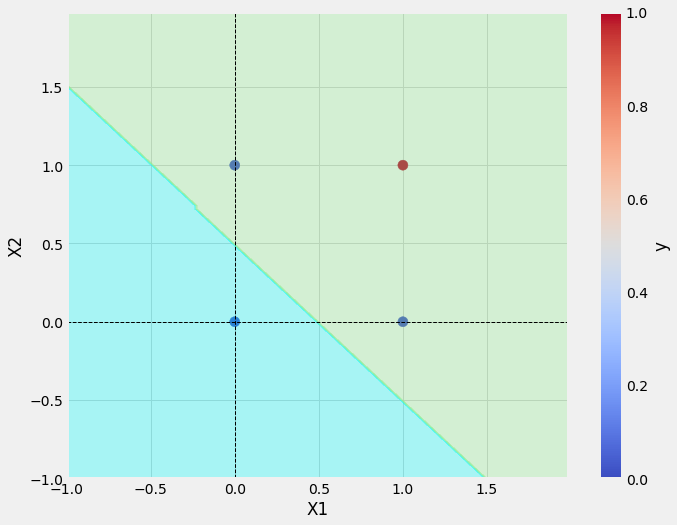

In [27]:
save_plot(df_AND, model_and, filename='and.png')

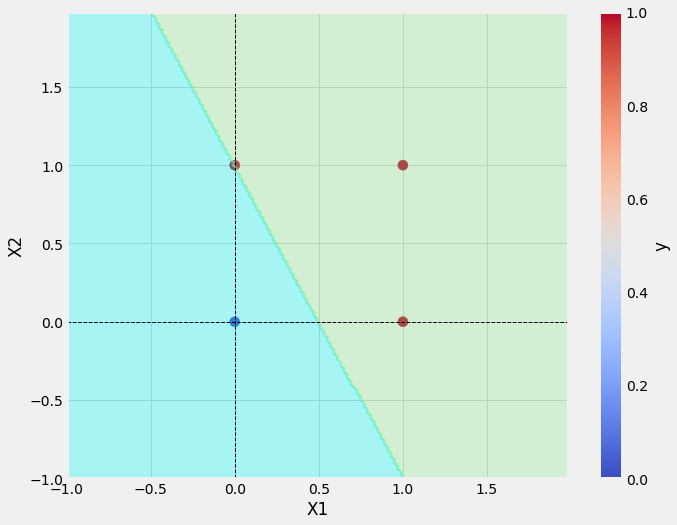

In [28]:
save_plot(df_OR, model_or, filename='or.png')

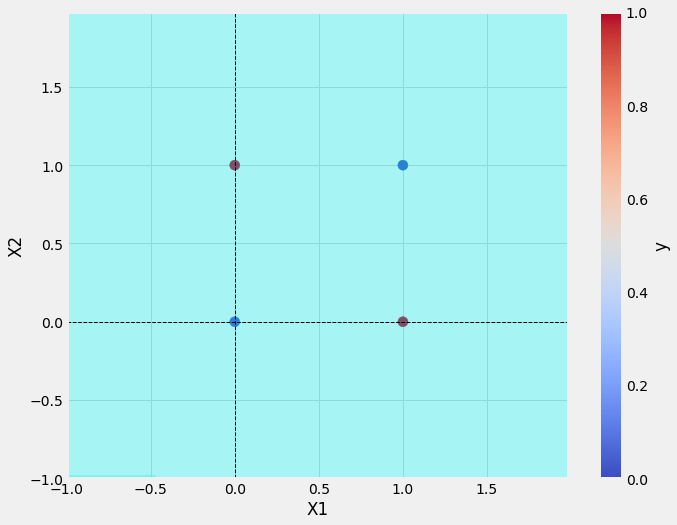

In [29]:
save_plot(df_XOR, model_xor, filename='xor.png')